In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's start with the equation of a leaky I&F neuron model:

$C \frac{dV_m}{dt} = -g_L(V_m - E_L) + I$

where $E_L$ is both the equilibrium and the reset potential.

We normalize the voltage $V_m$ in the range $[E_L,V_{th}]$:

$u = \frac{V_m - E_L}{V_{th} - E_L}$

Then

$\frac{dV_m}{dt} = (V_{th} - E_L) \frac{du}{dt}$

and

$\frac{C}{g}\frac{du}{dt} = - \frac{V_m-E_L}{V_{th}-E_L} + \frac{I}{g(V_{th}-E_L)}$,

which can be rewritten as

$\tau_m \frac{du}{dt} = -u + i$

where $\tau_m = C/g$ and $i = \frac{I}{g(V_{th}-E_L)}$.

In summary, $u$ is the (normalized) voltage, with reset at $u=0$ and threshold at $u=1$. The (normalized) current $i$ is such that the rheobase current is $i=1$.

#### f-I curve
The firing rate of the neuron is given by

$f(i) = \left\{\tau_{arp} + \tau_m \left[ \log(i) - \log(i-1) \right] \right\}^{-1}$

where $\tau_{arp}$ is the absolute refractory period.

In [2]:
def F(i,tau,tarp=0):
    if np.isscalar(i):
        if i <= 1:
            return 0
        return 1 / (tarp+tau*(np.log(i)-np.log(i-1)))
    f = np.zeros_like(i)
    idx = i > 1
    f[idx] = 1 / (tarp + tau*(np.log(i[idx])-np.log(i[idx]-1)))
    return f

#### Numerical integration

In [3]:
taum = 20e-3
tarp = 2e-3
dt = 0.025e-3
tend = 1
t = np.r_[0 : tend : dt]
u = np.zeros_like(t)
n_steps = t.size
t_last_spike = -1000
n_spikes = 0
i = 1.25
for j in range(n_steps-1):
    u[j+1] = u[j] + dt * (i - u[j]) / taum
    if t[j] - t_last_spike < 2e-3:
        u[j+1] = u[j]
    if u[j+1] > 1:
        u[j+1] = 0
        t_last_spike = t[j]
        n_spikes += 1
print('Firing rate: {} spikes/s.'.format(n_spikes/tend))

Firing rate: 29.0 spikes/s.


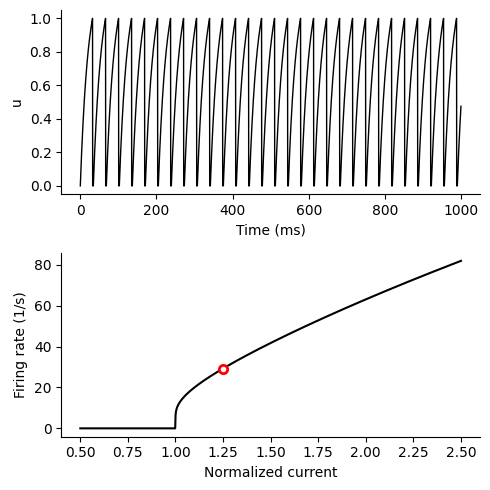

In [4]:
ii = np.linspace(0.5, 2.5, 1000)
f = F(ii,taum,tarp)
fig,ax = plt.subplots(2, 1, figsize=(5,5))
ax[0].plot(t*1e3, u, 'k', lw=1)
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('u')
ax[1].plot(ii, f, 'k')
ax[1].plot(i, n_spikes/tend, 'ro', markersize=6, markerfacecolor='w', markeredgewidth=2)
ax[1].set_xlabel('Normalized current')
ax[1].set_ylabel('Firing rate (1/s)')
sns.despine()
fig.tight_layout()